In [1]:
from __future__ import print_function 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib as mpl 
import datetime as dt

mpl.rcParams['savefig.dpi'] = 100 
mpl.rcParams['figure.dpi'] = 100
mpl.rcParams.update({'font.size': 40})

%config InlineBackend.figure_format = 'retina' 
%matplotlib inline

import matplotlib.dates as mdates

# GeoJSON

https://mygeodata.cloud/

Test with

http://geojson.io/#map=11/40.6702/-73.9751

In [2]:
import json

gjs = json.load(open('taxi_zones.geojson', 'r'))

In [3]:
len(gjs['features'])

263

In [4]:
gjs['features'][33]['geometry']['coordinates'][0][:5]

[[[-73.972320321199, 40.70908288315217],
  [-73.97066975742995, 40.70725970882147],
  [-73.97054062182238, 40.70731607635383],
  [-73.9702621853228, 40.70688750428401],
  [-73.97048881848585, 40.70540066562183],
  [-73.97016894509909, 40.70536185340731],
  [-73.97018075572805, 40.70492927056683],
  [-73.96762114779943, 40.70334850519435],
  [-73.96751516691086, 40.70343735687813],
  [-73.96747674493034, 40.703949870956215],
  [-73.96833263747038, 40.70448338458415],
  [-73.96929693837701, 40.70508833122962],
  [-73.96923632685237, 40.70599431249845],
  [-73.96929296374243, 40.707093331047766],
  [-73.96838933699995, 40.7068291869999],
  [-73.967951391, 40.70573121699989],
  [-73.96761547799979, 40.70496163499989],
  [-73.96720961999985, 40.70425570899992],
  [-73.96653747199994, 40.70369661299984],
  [-73.96607413599993, 40.70332015299992],
  [-73.965874186, 40.70315769499991],
  [-73.9652043899999, 40.702622744999864],
  [-73.96451844799995, 40.702074977999885],
  [-73.96386889399994,

In [5]:
gjs['features'][3]

{u'geometry': {u'coordinates': [[[-73.97177410965318, 40.72582128133706],
    [-73.97179142961484, 40.725814221149086],
    [-73.97181650587731, 40.72581496675258],
    [-73.97185935830923, 40.72558296903032],
    [-73.97187437695212, 40.725503116079736],
    [-73.97188490951471, 40.72542440506575],
    [-73.97191120732053, 40.7252903706999],
    [-73.97193374501082, 40.72517629035116],
    [-73.97193975456328, 40.72515803861004],
    [-73.97196154778592, 40.72503997881086],
    [-73.97200511841213, 40.72484148970816],
    [-73.97203666966881, 40.72468407002009],
    [-73.97206595867397, 40.72455915832873],
    [-73.97207196960339, 40.72453635085808],
    [-73.97208098151924, 40.72449756793038],
    [-73.97208400057282, 40.72446790554569],
    [-73.97209751290907, 40.72442341523471],
    [-73.97215609001734, 40.724170178278094],
    [-73.97216585996632, 40.72413196327314],
    [-73.9722169237619, 40.72393005464676],
    [-73.9722334467696, 40.72384677992629],
    [-73.97226499868246, 4

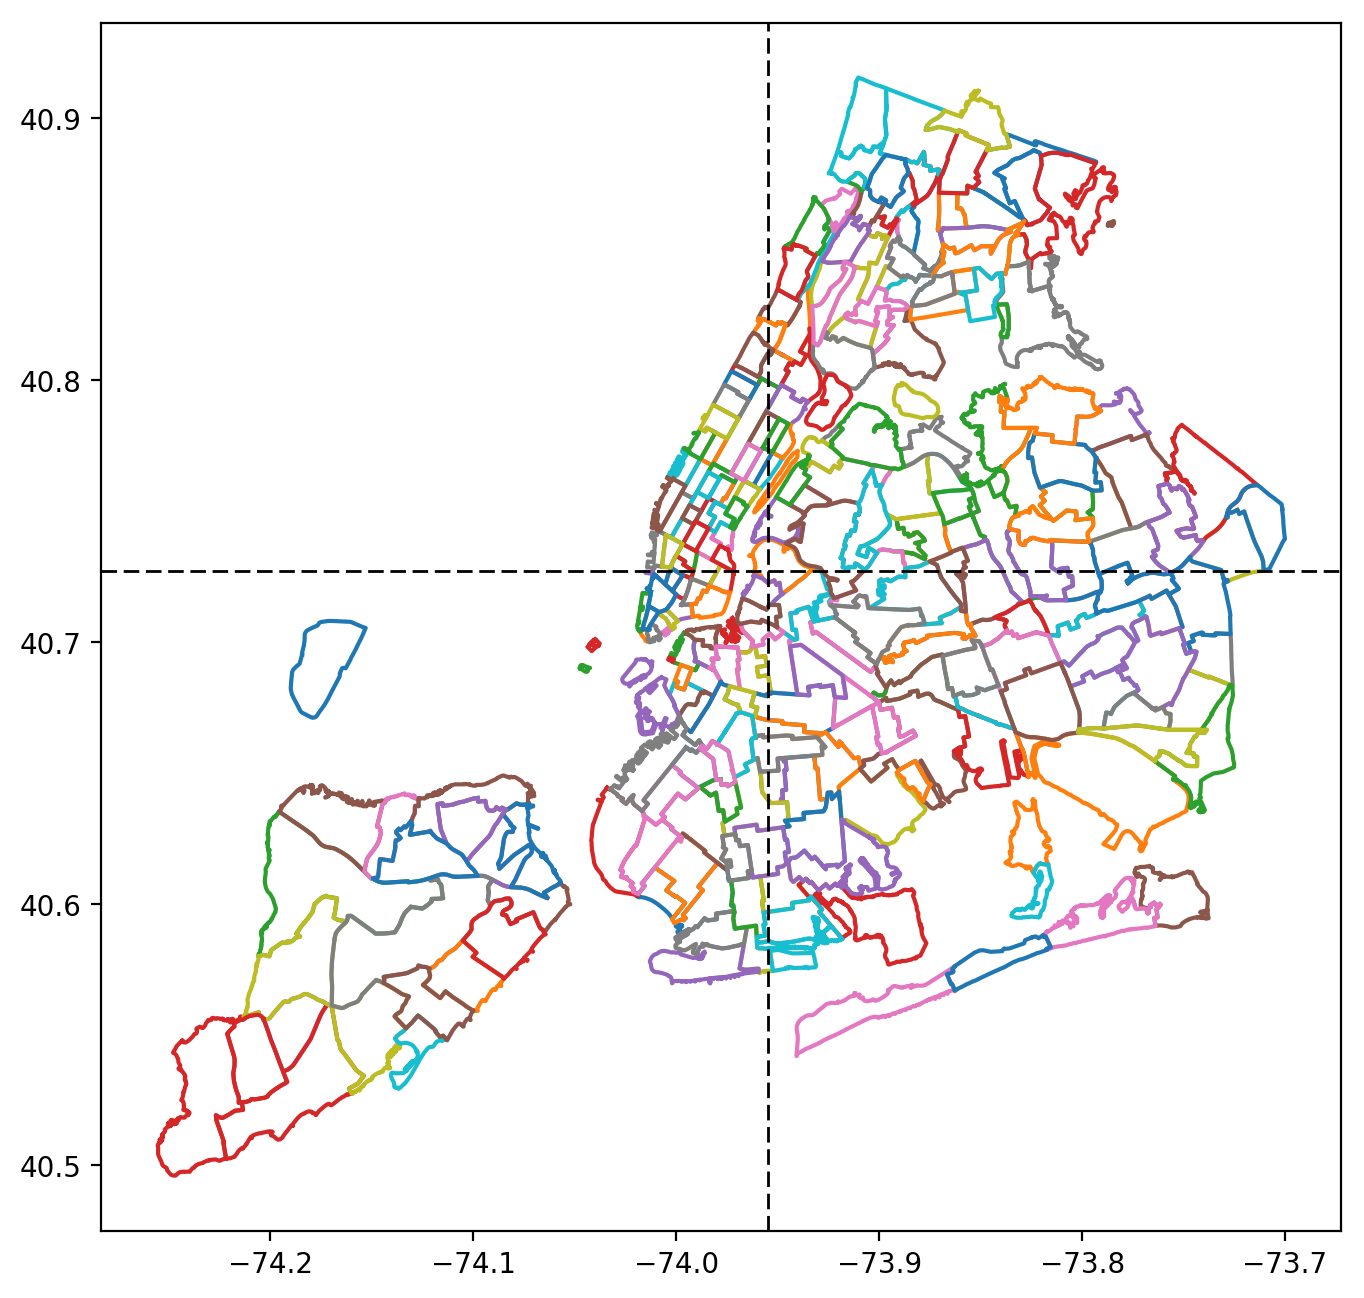

In [6]:
plt.figure(figsize=(8,8))
test_lon, test_lat = -73.955, 40.727
for feature in gjs['features']:
    coords = feature['geometry']['coordinates'][0]
    if len(coords) < 3:
        coords = coords[0]
    x = [i[0] for i in coords]
    y = [i[1] for i in coords]
    plt.plot(x,y)
plt.axhline(y=test_lat, linewidth=1, color='k', linestyle='--')
plt.axvline(x=test_lon, linewidth=1, color='k', linestyle='--')
plt.show()

In [7]:
from shapely.geometry import shape, Point
# depending on your version, use: from shapely.geometry import shape, Point

# construct point based on lon/lat returned by geocoder
point = Point(test_lon, test_lat)

# check each polygon to see if it contains the point
for feature in gjs['features']:
    polygon = shape(feature['geometry'])
    if polygon.contains(point):
        print ('Found containing polygon:', json.dumps(feature['properties'], indent=2))

Found containing polygon: {
  "Shape_Area": 0.000462068671429, 
  "OBJECTID": 112, 
  "zone": "Greenpoint", 
  "LocationID": 112, 
  "Shape_Leng": 0.107267875765, 
  "borough": "Brooklyn"
}


In [8]:
import re
zone_names = [str(feat['properties']['zone']) for feat in gjs['features']]
parent_zone_names = [re.sub('/.*', '', zone) for zone in zone_names]

# Read Rent Prices

In [9]:
import pandas as pd

In [10]:
rentals = pd.read_csv('Neighborhood_MedianRentalPrice_1Bedroom.csv')
rentals = rentals[(rentals['City'] == 'New York') & (rentals['Metro'] == 'New York')]

In [11]:
rentals['RegionName']

2         Upper West Side
4         Upper East Side
5           East New York
9      Washington Heights
11                Astoria
15           Williamsburg
16     Bedford Stuyvesant
17               Flatbush
18          Crown Heights
19                Jamaica
20                 Harlem
21         Williamsbridge
22            East Harlem
23               Bushwick
25          East Flatbush
26                 Corona
27            Sunset Park
28              Concourse
30               Elmhurst
31            Bensonhurst
33              Soundview
34        Lower East Side
36               Flushing
38            Murray Hill
39         Sheepshead Bay
40              Gravesend
42           Forest Hills
43           East Village
46        Jackson Heights
48                Midwood
              ...        
118             Briarwood
119        Brighton Beach
120     Flatiron District
125            Pelham Bay
129          Clinton Hill
134          West Village
135           Kew Gardens
137      Bro

In [12]:
reg_name = set(rentals['RegionName'])

In [24]:
zon_name = set(parent_zone_names)

In [30]:
# Subset mapping.
mapping = {}
for name in reg_name:
    for zname in zon_name:
        # Williamsburg North -> Williamsburg
        if name in zname:
            mapping[zname] = name
print(len(mapping))

111


In [31]:
# Remaining unmapped?
unmapped_zones = [z for z in zon_name if z not in mapping]
print(unmapped_zones)

['Ozone Park', 'Brooklyn Navy Yard', 'TriBeCa', 'Ridgewood', 'Co-Op City', 'Queensboro Hill', 'Stuy Town', 'Port Richmond', 'Bay Terrace', 'Allerton', 'Rossville', 'West Farms', 'Breezy Point', 'Prospect-Lefferts Gardens', 'Auburndale', 'South Ozone Park', 'World Trade Center', 'Saint Albans', 'Crotona Park East', 'Bedford', 'Great Kills', 'Chinatown', 'Springfield Gardens North', 'Ocean Hill', 'Cambria Heights', 'Queens Village', 'Two Bridges', 'Highbridge', 'Belmont', 'Long Island City', 'Melrose South', 'Hunts Point', 'Prospect Park', 'Schuylerville', 'Mariners Harbor', 'Flatiron', 'Woodlawn', 'Manhattanville', 'Bloomfield', 'Union Sq', 'Erasmus', 'Stuyvesant Heights', 'Bronxdale', 'Newark Airport', 'Country Club', 'Van Nest', 'Claremont', 'Arden Heights', 'Middle Village', 'Van Cortlandt Park', 'Saint Michaels Cemetery', 'Bloomingdale', 'Steinway', 'Times Sq', 'Freshkills Park', 'Flatlands', 'Westchester Village', 'Laurelton', 'Van Cortlandt Village', 'LaGuardia Airport', 'Hammels'

In [32]:
# Unmapped regions for rent
known = set(mapping.values())
unmapped_regs = [r for r in reg_name if r not in known]
unmapped_regs

['Turtle Bay',
 'Clinton Hill',
 'Greenwood',
 'Columbus Circle',
 'Bedford Stuyvesant',
 'Tudor City',
 'Tribeca',
 'Hunters Point',
 'Kew Gardens Hills',
 'Flatiron District',
 'NoHo',
 'Morris Park',
 'Fort Hamilton']

In [33]:
# In the regions, but not zones
len(reg_name - zon_name)

32

In [21]:
# In zones, but not regions.
len(zon_name - reg_name)

197

In [16]:
# Overlap?
len(zon_name) - len(zon_name - reg_name)

57

Task: I have two area namespaces. The taxi trip data is more granular than the apartment listings. What to do?

Group taxi zones into apartment zones. How?

In [17]:
cols = rentals.columns
# Rental column prices.
rents = [c for c in cols if any(map(lambda z: z in c, ['2013', '2014', '2015', '2016']))]
rent_pd = rentals[rents]

In [18]:
# For each month, how many areas have rental prices?
rent_pd.describe().ix['count']

2013-01    85.0
2013-02    86.0
2013-03    86.0
2013-04    86.0
2013-05    86.0
2013-06    86.0
2013-07    87.0
2013-08    87.0
2013-09    88.0
2013-10    89.0
2013-11    89.0
2013-12    90.0
2014-01    90.0
2014-02    90.0
2014-03    90.0
2014-04    90.0
2014-05    90.0
2014-06    90.0
2014-07    90.0
2014-08    90.0
2014-09    90.0
2014-10    90.0
2014-11    90.0
2014-12    90.0
2015-01    90.0
2015-02    90.0
2015-03    90.0
2015-04    90.0
2015-05    90.0
2015-06    90.0
2015-07    90.0
2015-08    90.0
2015-09    90.0
2015-10    90.0
2015-11    90.0
2015-12    90.0
2016-01    90.0
2016-02    90.0
2016-03    90.0
2016-04    90.0
2016-05    90.0
2016-06    90.0
2016-07    90.0
2016-08    90.0
2016-09    90.0
2016-10    90.0
2016-11    90.0
2016-12    90.0
Name: count, dtype: float64

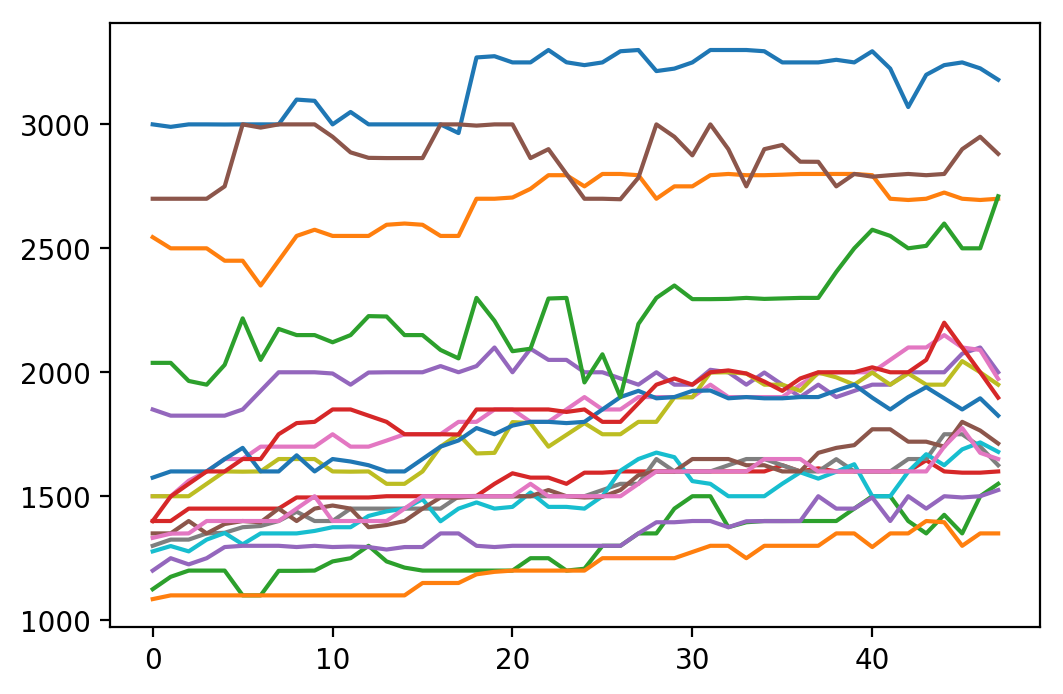

In [20]:
plt.figure()

for region_index in rent_pd.index[:17]:
    lbl = rentals.loc[region_index]['RegionName']
    plt.plot(list(rent_pd.loc[region_index]), label=lbl)
#plt.legend(loc='best')
plt.show()

# Zip Code

Using neighborhood names is a little ill-defined. Let's use zip codes instead.

In [34]:
import geojson

ImportError: No module named geojson